In [1]:
import os                          # Access system file-tree
import sys                         # Modify system parameters

import numpy as np                 # Data structures
import pandas as pd                # Data structures

import matplotlib.ticker as mticker  # Scientific notation in labels
from matplotlib.ticker import FuncFormatter

# Global options for external dependencies
np.set_printoptions(threshold=sys.maxsize, precision=16)

In [2]:
# Internal Dependencies
internalPath = os.getcwd() + "/../python"
print(internalPath)
sys.path.insert(0, internalPath)

from plotStyling import PlotStyling  # noqa: E402
from simulationDataLoad import gsd_df, find_compressed_data, load_compressed_data, parse_loaded_data

/home/aglisman/Dropbox/3_Brady_Lab/Code/potential-flow/bodies-in-potential-flow/jupyter_notebooks/../python


In [3]:
# Parameters
data_source = ["v1.0.0_output_last_frame", "v1.5.1", "v1.6.1"]
parameters_varied = ["varyRelDisp", "varyZHeight"]
eps_output = True
output_dir = "figures"

# Paths
cwd = os.getcwd()
relative_path_base = [cwd + "/../data_tag/" + d for d in data_source]
output_dir = cwd + "/internal_dynamics_comparison"

In [4]:
# Correctly get scientific notation in text elements
def scientific(x, pos):
    return '%0.2e' % x


scientific_formatter = FuncFormatter(scientific)
fmt = mticker.FuncFormatter(scientific_formatter)

In [5]:
# Data output parameters
saved_data_file = output_dir + "/data.pkl"

# Try making output dir if not exists
try:
    os.mkdir(output_dir)
except FileExistsError:
    pass

# Load data from source or pickle
if os.path.exists(saved_data_file):
    all_data_df = pd.read_pickle(saved_data_file, compression='xz')
else:
    all_data_df = gsd_df(relative_path_base, parameters_varied)
    all_data_df.to_pickle(saved_data_file, compression='xz')

/home/aglisman/Dropbox/3_Brady_Lab/Code/potential-flow/bodies-in-potential-flow/jupyter_notebooks/../python/simulationDataLoad.py:38: UserWarning: Failure to find data. No data path found in parameter: varyZHeight, relative path: /home/aglisman/Dropbox/3_Brady_Lab/Code/potential-flow/bodies-in-potential-flow/jupyter_notebooks/../data_tag/v1.0.0_output_last_frame
  warnings.warn(


In [6]:
# Preview data
print((len(all_data_df)))
all_data_df.head(1)

183


,gsd_path,CoM_disp,CoM_disp_comp,R_avg,phase_shift,U0,omega,epsilon,time,positions,velocities,accelerations,q,q0,theta,theta_dot,theta_ddot
0,/home/aglisman/Dropbox/3_Brady_Lab/Code/potent...,0.61661,"[0.6166097724680042, 1.566017786447298e-18, -4...",2.0007,-1.570796,1.0,1.0,0.499825,"[0.0, 9.999999999999982e-05, 0.000199999999999...","[[[2.0007, 2.001121769453904, 2.00154339444683...","[[[0.6713811132836719, 0.6711513113122677, 0.6...","[[[-0.3339157466887272, -0.3659234453410905, -...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
# split data into system types
collinear_swimmer_isolated_df = all_data_df.loc[all_data_df['gsd_path'].str.contains(
    "v1.0.0", case=False, regex=False)]
collinear_swimmer_wall_df = all_data_df.loc[all_data_df['gsd_path'].str.contains(
    "v1.5.1", case=False, regex=False)]
collinear_swimmer_wall_no_int_dyn_df = all_data_df.loc[all_data_df['gsd_path'].str.contains(
    "v1.6.1", case=False, regex=False)]

# split data further into varyZHeight
csi_vary_rel_disp = collinear_swimmer_isolated_df.loc[collinear_swimmer_isolated_df['gsd_path'].str.contains(
    "varyRelDisp", case=False, regex=False)]
csw_vary_z = collinear_swimmer_wall_df.loc[collinear_swimmer_wall_df['gsd_path'].str.contains(
    "varyZ", case=False, regex=False)]
csw_noint_vary_z = collinear_swimmer_wall_no_int_dyn_df.loc[collinear_swimmer_wall_no_int_dyn_df['gsd_path'].str.contains(
    "varyZ", case=False, regex=False)]

In [20]:
# Get parameters from wall problem
print(csw_vary_z["R_avg"].describe())

# Match with parameters from isolated case
csi_comparison = csi_vary_rel_disp.loc[csi_vary_rel_disp['R_avg'] == 4.0]
csi_com = csi_comparison['CoM_disp']
csi_com_t25 = 25.0 * csi_com
print(csi_com_t25)

count    12.0
mean      4.0
std       0.0
min       4.0
25%       4.0
50%       4.0
75%       4.0
max       4.0
Name: R_avg, dtype: float64
28    0.318596
Name: CoM_disp, dtype: float64


TypeError: scatter_dashed() missing 2 required positional arguments: 'x_data' and 'y_data'

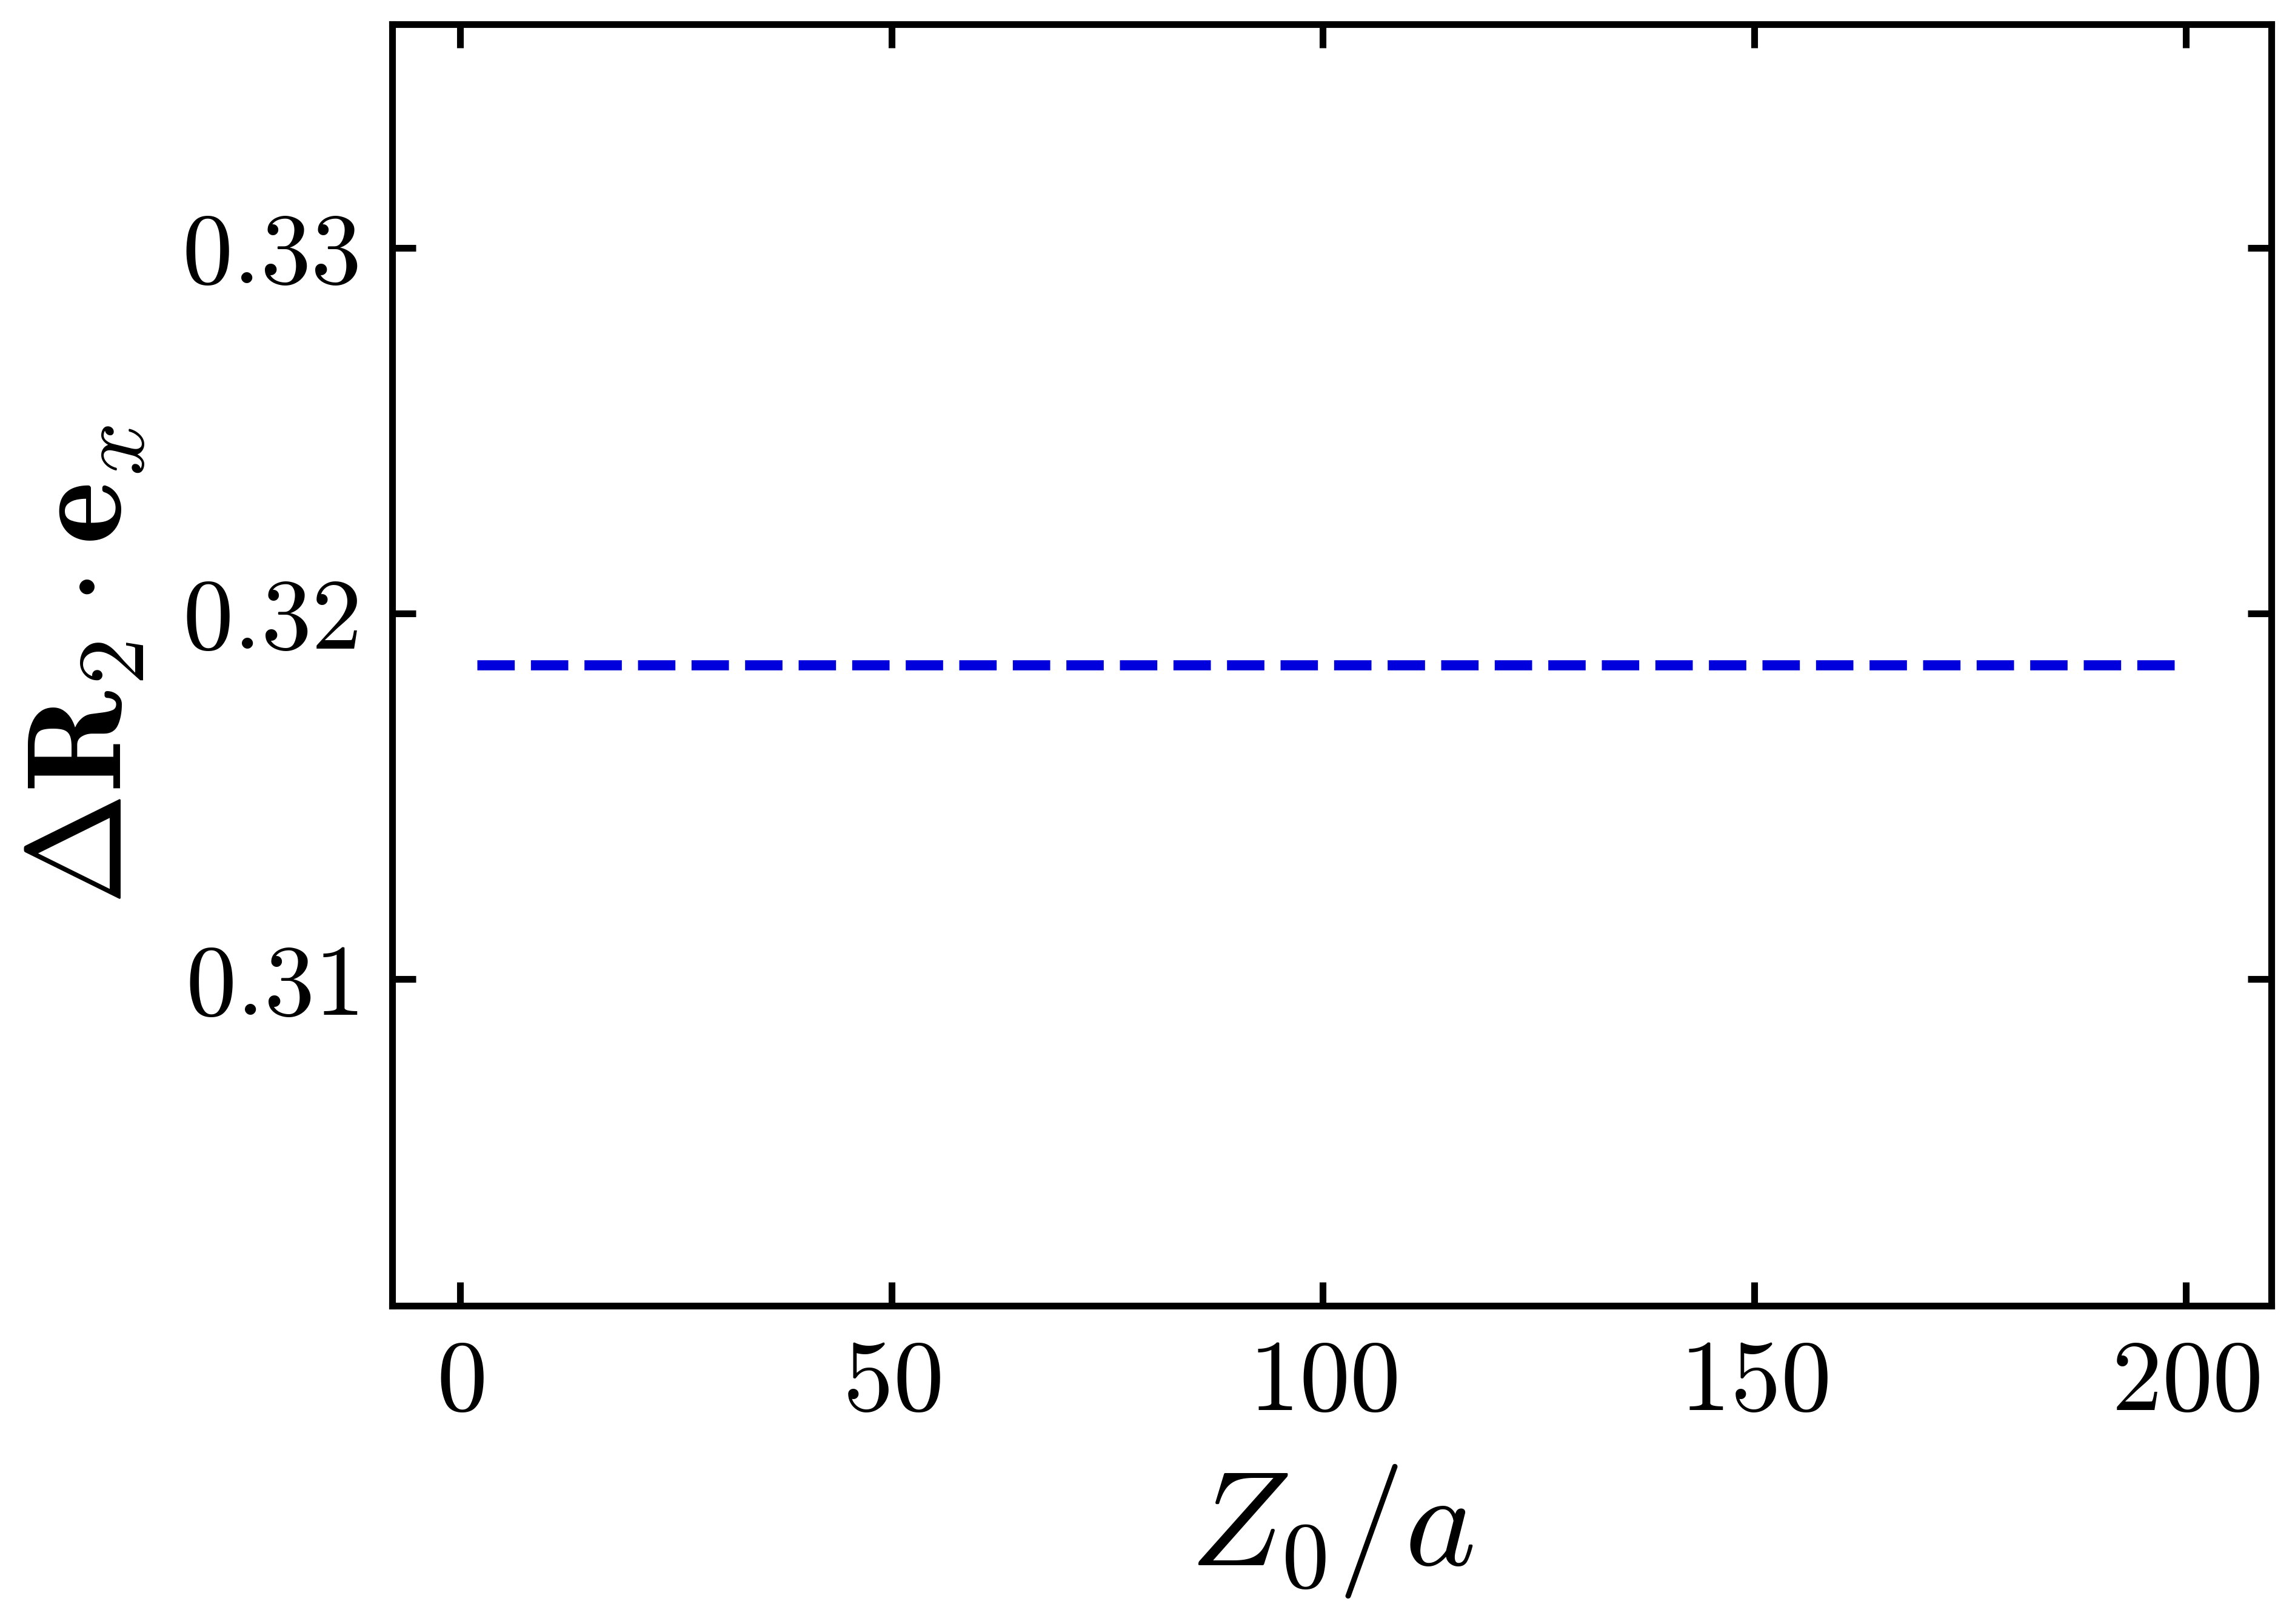

In [24]:
# Prepare data for plot
csw_noint_vary_z.sort_values(by='Z_0')
csw_vary_z.sort_values(by='Z_0')

# PLOT: CoM displacement along x-axis (initial propulsion direction) for varying Z-height
numLines = 3
CoM_x_disp_plot = PlotStyling(numLines,
                            r"$Z_{0} / a$", r"$\Delta \mathbf{R}_{2} \cdot \mathbf{e}_{x}$",
                            title=None, loglog=False,
                            outputDir=output_dir, figName="com_x_disp_comp",
                            eps=eps_output, continuousColors=False)
CoM_x_disp_plot.make_plot(showPlot=True)
CoM_x_disp_plot.curve([2.0, 200.0], [csi_com_t25, csi_com_t25],
        thin_curve=False, dashed_curve=True, zorder=0, label="Isolated swimmer")
CoM_x_disp_plot.scatter_dashed(csw_vary_z['Z_0'], csw_vary_z['CoM_disp_x'], 
        marker=None, zorder=1, label="Swimmer & wall")
CoM_x_disp_plot.scatter_dashed(csw_noint_vary_z['Z_0'], csw_noint_vary_z['CoM_disp_x'], 
        marker=None, zorder=2, label="Swimmer & wall, no internal dynamics")
CoM_x_disp_plot.legend(title=None, loc='best', bbox_to_anchor=(0.05, 0.05, 0.9, 0.9), ncol=1)
CoM_x_disp_plot.save_plot()


In [11]:
# PLOT: CoM displacement along z-axis (initial attraction direction) for varying Z-height
